In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 파일 불러오기
het = pd.read_csv('korea_het.het', sep='\t', engine='python', encoding='cp949')
het = het[['FID', 'IID', 'O(HOM)', 'N(NM)']]
het.columns = ['FID', 'IID', 'O', 'N']
het['Heterozygosity_rate'] = (het['N'] - het['O']) / het['N'] 
het = het[['FID', 'Heterozygosity_rate']]
het

,FID,Heterozygosity_rate
0,FAMUC2640,0.170192
1,FAMUC2652,0.168353
2,FAMUC2646,0.170911
3,FAMUC2658,0.167032
4,FAMUC2641,0.168408
...,...,...
2114,FAMIBD2569,0.169382
2115,FAMIBD2551,0.168113
2116,FAMIBD2564,0.168628
2117,FAMIBD2558,0.170163


In [5]:
# 파일 불러오기
imiss = pd.read_csv('plink.imiss', sep='\t', engine='python', encoding='cp949')
imiss = imiss[['FID', 'F_MISS']]
imiss

,FID,F_MISS
0,FAMUC2640,0.007153
1,FAMUC2652,0.007133
2,FAMUC2646,0.005926
3,FAMUC2658,0.006403
4,FAMUC2641,0.005998
...,...,...
2114,FAMIBD2569,0.005928
2115,FAMIBD2551,0.006664
2116,FAMIBD2564,0.007002
2117,FAMIBD2558,0.008600


In [6]:
sct = pd.merge(het, imiss, how='inner', on='FID')
sct

,FID,Heterozygosity_rate,F_MISS
0,FAMUC2640,0.170192,0.007153
1,FAMUC2652,0.168353,0.007133
2,FAMUC2646,0.170911,0.005926
3,FAMUC2658,0.167032,0.006403
4,FAMUC2641,0.168408,0.005998
...,...,...,...
2114,FAMIBD2569,0.169382,0.005928
2115,FAMIBD2551,0.168113,0.006664
2116,FAMIBD2564,0.168628,0.007002
2117,FAMIBD2558,0.170163,0.008600


In [7]:
sct[sct['F_MISS'] > 0.4]

,FID,Heterozygosity_rate,F_MISS
472,FAMKNIH0226,0.590991,0.4482
1424,FAMKNIH0452,0.249801,0.4125


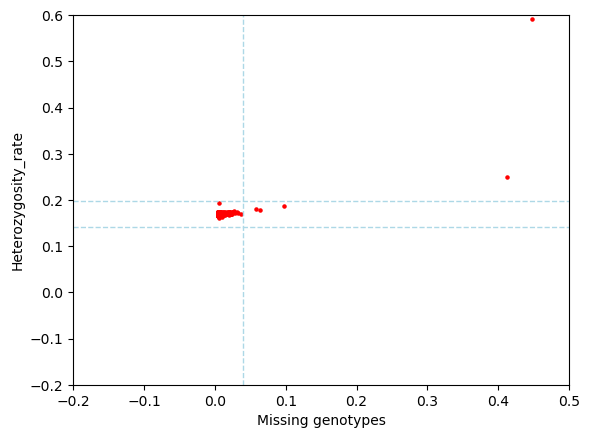

In [8]:
plt.scatter(sct['F_MISS'], sct['Heterozygosity_rate'], s=5, c='red')
plt.xlabel('Missing genotypes')
plt.ylabel('Heterozygosity_rate')
plt.xlim([-0.2, 0.5])
plt.ylim([-0.2, 0.6])
plt.axhline(0.14206952323265107, 0, 1, color='lightblue', linestyle='--', linewidth=1)
plt.axhline(0.19866746748613098, 0, 1, color='lightblue', linestyle='--', linewidth=1)
plt.axvline(0.04, 0, 1, color='lightblue', linestyle='--', linewidth=1)
plt.show()